<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Anomaly_Detection_in_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from datetime import datetime
import seaborn as sns   

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NYC.csv to NYC.csv


In [3]:
df1 = pd.read_csv('NYC.csv')

In [4]:
df1.head()

timestamp  value
0  7/1/2014 0:00  10844
1  7/1/2014 0:30   8127
2  7/1/2014 1:00   6210
3  7/1/2014 1:30   4656
4  7/1/2014 2:00   3820

In [5]:
df1['timestamp']= pd.to_datetime(df1['timestamp'])

In [6]:
df1.head()

timestamp  value
0 2014-07-01 00:00:00  10844
1 2014-07-01 00:30:00   8127
2 2014-07-01 01:00:00   6210
3 2014-07-01 01:30:00   4656
4 2014-07-01 02:00:00   3820

In [7]:
df1.dtypes

timestamp    datetime64[ns]
value                 int64
dtype: object

In [8]:
df1.shape

(10320, 2)

In [9]:
df1= df1.set_index('timestamp').resample('H').mean()

In [10]:
df1.head()

value
timestamp                  
2014-07-01 00:00:00  9485.5
2014-07-01 01:00:00  5433.0
2014-07-01 02:00:00  3346.5
2014-07-01 03:00:00  2216.5
2014-07-01 04:00:00  2189.5

In [11]:
df1.shape

(5160, 1)

In [12]:
figure = px.line(df1.reset_index(), x ='timestamp', y = 'value', title = 'NYC axi Demand')

figure.update_xaxes(rangeslider_visible= True)
figure.show()

In [13]:
from fbprophet import Prophet

In [14]:
df2 = df1.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [15]:
df2

ds        y
0    2014-07-01 00:00:00   9485.5
1    2014-07-01 01:00:00   5433.0
2    2014-07-01 02:00:00   3346.5
3    2014-07-01 03:00:00   2216.5
4    2014-07-01 04:00:00   2189.5
5    2014-07-01 05:00:00   3439.5
6    2014-07-01 06:00:00   8782.5
7    2014-07-01 07:00:00  14861.0
8    2014-07-01 08:00:00  19133.0
9    2014-07-01 09:00:00  19823.0
10   2014-07-01 10:00:00  18352.0
11   2014-07-01 11:00:00  17856.0
12   2014-07-01 12:00:00  18897.0
13   2014-07-01 13:00:00  18818.5
14   2014-07-01 14:00:00  20068.5
15   2014-07-01 15:00:00  18962.0
16   2014-07-01 16:00:00  15620.5
17   2014-07-01 17:00:00  18364.0
18   2014-07-01 18:00:00  25282.0
19   2014-07-01 19:00:00  25865.5
20   2014-07-01 20:00:00  21634.5
21   2014-07-01 21:00:00  23920.0
22   2014-07-01 22:00:00  22525.5
23   2014-07-01 23:00:00  18107.5
24   2014-07-02 00:00:00  11657.5
25   2014-07-02 01:00:00   6744.0
26   2014-07-02 02:00:00   4227.0
27   2014-07-02 03:00:00   2764.0
28   2014-07-02 04:00:00   2527.5
29   2014-07-02 05:00:00   3675.0
30   2014-07-02 06:00:00   8933.0
31   2014-07-02 07:00:00  15214.5
32   2014-07-02 08:00:00  19554.5
33   2014-07-02 09:00:00  19248.0
34   2014-07-02 10:00:00  17607.5
35   2014-07-02 11:00:00  17861.0
36   2014-07-02 12:00:00  19196.5
37   2014-07-02 13:00:00  18872.5
38   2014-07-02 14:00:00  18569.5
39   2014-07-02 15:00:00  17295.5
40   2014-07-02 16:00:00  14261.0
41   2014-07-02 17:00:00  19674.5
42   2014-07-02 18:00:00  24072.5
43   2014-07-02 19:00:00  25879.5
44   2014-07-02 20:00:00  20134.0
45   2014-07-02 21:00:00  21710.0
46   2014-07-02 22:00:00  20728.5
47   2014-07-02 23:00:00  16412.5
48   2014-07-03 00:00:00  11604.0
49   2014-07-03 01:00:00   7757.0
50   2014-07-03 02:00:00   5104.5
51   2014-07-03 03:00:00   3109.0
52   2014-07-03 04:00:00   3111.5
53   2014-07-03 05:00:00   3796.0
54   2014-07-03 06:00:00   8299.5
55   2014-07-03 07:00:00  13407.0
56   2014-07-03 08:00:00  17844.0
57   2014-07-03 09:00:00  17784.0
58   2014-07-03 10:00:00  16253.0
59   2014-07-03 11:00:00  16335.5
60   2014-07-03 12:00:00  18134.5
61   2014-07-03 13:00:00  19153.0
62   2014-07-03 14:00:00  19220.5
63   2014-07-03 15:00:00  17414.0
64   2014-07-03 16:00:00  14187.0
65   2014-07-03 17:00:00  18301.5
66   2014-07-03 18:00:00  21994.5
67   2014-07-03 19:00:00  25743.0
68   2014-07-03 20:00:00  22436.0
69   2014-07-03 21:00:00  21118.0
70   2014-07-03 22:00:00  16871.0
71   2014-07-03 23:00:00  16093.0
72   2014-07-04 00:00:00  14993.0
73   2014-07-04 01:00:00  11938.0
74   2014-07-04 02:00:00   9192.0
75   2014-07-04 03:00:00   6889.0
76   2014-07-04 04:00:00   5065.5
77   2014-07-04 05:00:00   3367.5
78   2014-07-04 06:00:00   3917.5
79   2014-07-04 07:00:00   4877.0
80   2014-07-04 08:00:00   5470.5
81   2014-07-04 09:00:00   7588.5
82   2014-07-04 10:00:00   9177.0
83   2014-07-04 11:00:00  12127.5
84   2014-07-04 12:00:00  13675.0
85   2014-07-04 13:00:00  14900.0
86   2014-07-04 14:00:00  18372.5
87   2014-07-04 15:00:00  16496.0
88   2014-07-04 16:00:00  14086.0
89   2014-07-04 17:00:00  11890.5
90   2014-07-04 18:00:00  15282.0
91   2014-07-04 19:00:00  14743.0
92   2014-07-04 20:00:00  14105.5
93   2014-07-04 21:00:00  14028.5
94   2014-07-04 22:00:00  16091.0
95   2014-07-04 23:00:00  18009.5
96   2014-07-05 00:00:00  16882.5
97   2014-07-05 01:00:00  13488.0
98   2014-07-05 02:00:00  10078.5
99   2014-07-05 03:00:00   7553.0
100  2014-07-05 04:00:00   5414.0
101  2014-07-05 05:00:00   2820.0
102  2014-07-05 06:00:00   2849.0
103  2014-07-05 07:00:00   4001.5
104  2014-07-05 08:00:00   5465.0
105  2014-07-05 09:00:00   8232.0
106  2014-07-05 10:00:00  10884.0
107  2014-07-05 11:00:00  12346.5
108  2014-07-05 12:00:00  12827.0
109  2014-07-05 13:00:00  13306.0
110  2014-07-05 14:00:00  13769.0
111  2014-07-05 15:00:00  14061.0
112  2014-07-05 16:00:00  13443.5
113  2014-07-05 17:00:00  14318.5
114  2014-07-05 18:00:00  15330.0
115  2014-07-05 19:00:00  17521.5
116  2014-07-05 20:00:00  14308.5
117  2014-

In [16]:
#splitting the data

train =  df2[(df2['ds'] >= '2014-07-01') & (df2['ds'] <= '2015-01-30')]
test =  df2[(df2['ds'] > '2015-01-30')]

In [17]:
train.shape

(5113, 2)

In [18]:
test.shape

(47, 2)

In [19]:
model = Prophet(interval_width=0.95)

In [20]:
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [21]:
#creates a linear model 
model.params

{'beta': array([[ 0.04305546,  0.00798031, -0.02913508, -0.00552902,  0.01221663,
          0.00635428, -0.16862109, -0.04731793, -0.10883105,  0.02918569,
         -0.00287108,  0.01110173,  0.02691386,  0.00302156]]),
 'delta': array([[ 2.77024704e-08, -2.53013635e-02, -3.51820231e-02,
         -3.73787772e-04, -1.63547603e-07,  1.84115705e-07,
          2.34694663e-02,  5.01119246e-02,  2.72889355e-02,
         -8.60614761e-08, -2.28525967e-07, -1.67495341e-07,
         -1.76627840e-07, -1.38960713e-06, -3.23391145e-02,
         -5.66491845e-02, -6.45828192e-02, -6.41474371e-02,
         -4.53870493e-02, -2.18629663e-02,  6.21911371e-08,
         -2.30146315e-08, -1.35732682e-07, -4.67992190e-04,
          2.12121332e-08]]),
 'k': array([[0.0780029]]),
 'm': array([[0.39352613]]),
 'sigma_obs': array([[0.10063828]]),
 'trend': array([[0.39352613, 0.39354139, 0.39355665, ..., 0.36381694, 0.36378419,
         0.36375143]])}

In [22]:
future_values = model.make_future_dataframe(periods=47,freq='H')

In [23]:
future_values.tail()

ds
5155 2015-01-31 19:00:00
5156 2015-01-31 20:00:00
5157 2015-01-31 21:00:00
5158 2015-01-31 22:00:00
5159 2015-01-31 23:00:00

In [24]:
forecast_values = model.predict(future_values)

In [25]:
forecast_values.head()

ds         trend   yhat_lower    yhat_upper   trend_lower  \
0 2014-07-01 00:00:00  14640.942874  5610.839722  20475.165164  14640.942874   
1 2014-07-01 01:00:00  14641.510569  2826.707252  17385.152574  14641.510569   
2 2014-07-01 02:00:00  14642.078264  -224.404201  13545.996712  14642.078264   
3 2014-07-01 03:00:00  14642.645960 -4500.702680  10318.289858  14642.645960   
4 2014-07-01 04:00:00  14643.213655 -5491.048449   9656.582286  14643.213655   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  14640.942874    -1559.139678          -1559.139678          -1559.139678   
1  14641.510569    -4591.415360          -4591.415360          -4591.415360   
2  14642.078264    -8159.874074          -8159.874074          -8159.874074   
3  14642.645960   -11368.432759         -11368.432759         -11368.432759   
4  14643.213655   -12781.056687         -12781.056687         -12781.056687   

          daily   daily_lower   daily_upper       weekly  weekly_lower  \
0   -149.150900   -149.150900   -149.150900 -1409.988778  -1409.988778   
1  -3268.382287  -3268.382287  -3268.382287 -1323.033073  -1323.033073   
2  -6920.797603  -6920.797603  -6920.797603 -1239.076471  -1239.076471   
3 -10209.837954 -10209.837954 -10209.837954 -1158.594806  -1158.594806   
4 -11699.066729 -11699.066729 -11699.066729 -1081.989958  -1081.989958   

   weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  -1409.988778                   0.0                         0.0   
1  -1323.033073                   0.0                         0.0   
2  -1239.076471                   0.0                         0.0   
3  -1158.594806                   0.0                         0.0   
4  -1081.989958                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  13081.803195  
1                         0.0  10050.095209  
2                         0.0   6482.204190  
3                         0.0   3274.213201  
4                         0.0   1862.156968

In [26]:
forecast_values[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
5155 2015-01-31 19:00:00  22919.363336  16344.501291  30211.701430
5156 2015-01-31 20:00:00  23480.523162  15839.912945  30507.173756
5157 2015-01-31 21:00:00  22355.936395  15240.803494  29813.758434
5158 2015-01-31 22:00:00  20156.387202  13312.423248  27198.252930
5159 2015-01-31 23:00:00  17611.573952   9568.800970  25005.026139

In [35]:
total_result = pd.concat([df2.set_index('ds')['y'],forecast_values.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)

In [42]:
total_result.head(20)

y          yhat    yhat_lower    yhat_upper
ds                                                                    
2014-07-01 00:00:00   9485.5  13081.803195   5610.839722  20475.165164
2014-07-01 01:00:00   5433.0  10050.095209   2826.707252  17385.152574
2014-07-01 02:00:00   3346.5   6482.204190   -224.404201  13545.996712
2014-07-01 03:00:00   2216.5   3274.213201  -4500.702680  10318.289858
2014-07-01 04:00:00   2189.5   1862.156968  -5491.048449   9656.582286
2014-07-01 05:00:00   3439.5   3126.504993  -4967.162034  10251.743571
2014-07-01 06:00:00   8782.5   6562.640819   -342.877895  13813.235575
2014-07-01 07:00:00  14861.0  10537.639146   3374.390213  17577.594347
2014-07-01 08:00:00  19133.0  13460.624254   5632.482622  20895.338030
2014-07-01 09:00:00  19823.0  14842.115434   6881.387180  22370.867700
2014-07-01 10:00:00  18352.0  15337.025677   7415.291956  22013.044744
2014-07-01 11:00:00  17856.0  15838.104475   8551.787452  22842.863387
2014-07-01 12:00:00  18897.0  16561.386654   8844.747538  24066.867335
2014-07-01 13:00:00  18818.5  16999.092569   9648.927813  23515.798618
2014-07-01 14:00:00  20068.5  16700.313092   9242.311602  24328.744609
2014-07-01 15:00:00  18962.0  16000.856259   9071.704942  23689.933526
2014-07-01 16:00:00  15620.5  15893.048783   8510.669756  22963.488859
2014-07-01 17:00:00  18364.0  17118.646396  10174.729225  24558.305911
2014-07-01 18:00:00  25282.0  19376.366418  11864.269609  26684.281501
2014-07-01 19:00:00  25865.5  21445.674621  14095.335912  28456.515233

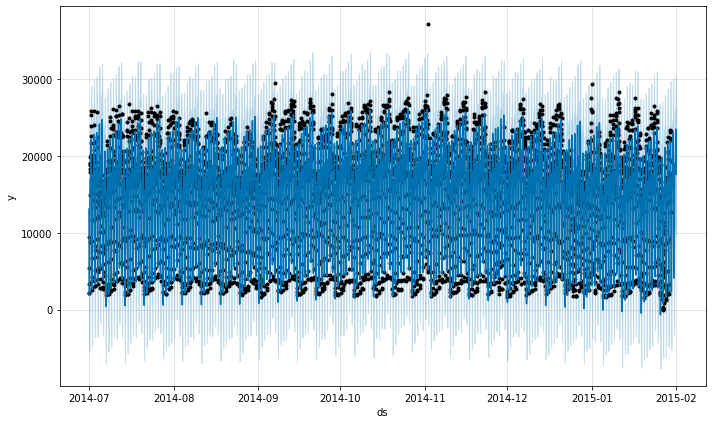

In [38]:
figure1 = model.plot(forecast_values)

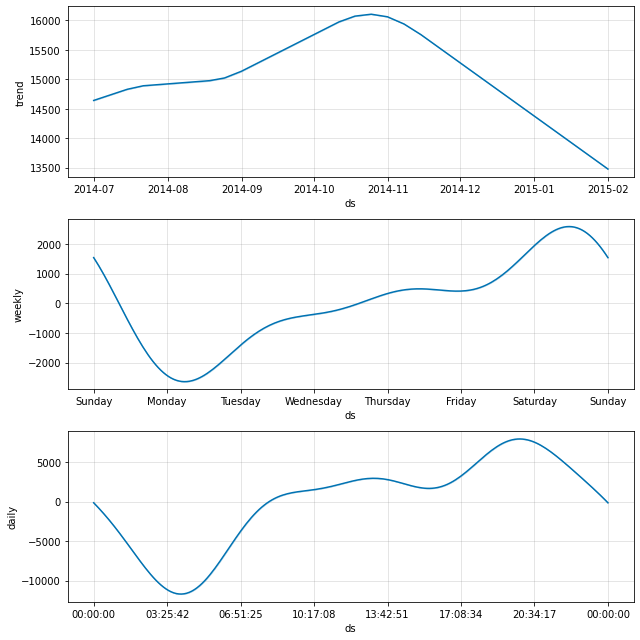

In [41]:
components = model.plot_components(forecast_values)

In [43]:
total_result['error']=total_result['y'] - total_result['yhat']

In [45]:
total_result['uncertainity']=total_result['yhat_upper']- total_result['yhat_lower']

In [46]:
total_result.head()

y          yhat   yhat_lower    yhat_upper  \
ds                                                                     
2014-07-01 00:00:00  9485.5  13081.803195  5610.839722  20475.165164   
2014-07-01 01:00:00  5433.0  10050.095209  2826.707252  17385.152574   
2014-07-01 02:00:00  3346.5   6482.204190  -224.404201  13545.996712   
2014-07-01 03:00:00  2216.5   3274.213201 -4500.702680  10318.289858   
2014-07-01 04:00:00  2189.5   1862.156968 -5491.048449   9656.582286   

                           error  uncertainity  
ds                                              
2014-07-01 00:00:00 -3596.303195  14864.325441  
2014-07-01 01:00:00 -4617.095209  14558.445322  
2014-07-01 02:00:00 -3135.704190  13770.400913  
2014-07-01 03:00:00 -1057.713201  14818.992537  
2014-07-01 04:00:00   327.343032  15147.630734

In [56]:
total_result[total_result['error'].abs() > 1*total_result['uncertainity']]

y          yhat    yhat_lower    yhat_upper  \
ds                                                                       
2014-11-02 01:00:00  37204.5  14147.030707   6492.484807  21275.764646   
2015-01-01 01:00:00  29292.0  11467.920500   4188.570104  19696.917622   
2015-01-01 02:00:00  25753.5   7840.455581    811.929143  15128.505916   
2015-01-01 03:00:00  22067.0   4573.654834  -2843.766584  11755.087455   
2015-01-26 20:00:00   3630.5  19764.217946  12395.449999  26955.972767   
2015-01-26 21:00:00   2907.0  18852.778435  11405.703217  26263.491668   
2015-01-26 22:00:00   1324.5  16877.765654   9764.667463  23728.308583   

                            error  uncertainity anomaly  
ds                                                       
2014-11-02 01:00:00  23057.469293  14783.279839     yes  
2015-01-01 01:00:00  17824.079500  15508.347519      No  
2015-01-01 02:00:00  17913.044419  14316.576774      No  
2015-01-01 03:00:00  17493.345166  14598.854039      No  
2015-01-26 20:00:00 -16133.717946  14560.522767      No  
2015-01-26 21:00:00 -15945.778435  14857.788451      No  
2015-01-26 22:00:00 -15553.265654  13963.641120      No

In [59]:
total_result['anomaly']= total_result.apply(lambda x: 'yes' if(np.abs(x['error']) > 1*x['uncertainity']) else 'No',axis=1)

In [60]:
total_result

y          yhat    yhat_lower    yhat_upper  \
ds                                                                       
2014-07-01 00:00:00   9485.5  13081.803195   5610.839722  20475.165164   
2014-07-01 01:00:00   5433.0  10050.095209   2826.707252  17385.152574   
2014-07-01 02:00:00   3346.5   6482.204190   -224.404201  13545.996712   
2014-07-01 03:00:00   2216.5   3274.213201  -4500.702680  10318.289858   
2014-07-01 04:00:00   2189.5   1862.156968  -5491.048449   9656.582286   
2014-07-01 05:00:00   3439.5   3126.504993  -4967.162034  10251.743571   
2014-07-01 06:00:00   8782.5   6562.640819   -342.877895  13813.235575   
2014-07-01 07:00:00  14861.0  10537.639146   3374.390213  17577.594347   
2014-07-01 08:00:00  19133.0  13460.624254   5632.482622  20895.338030   
2014-07-01 09:00:00  19823.0  14842.115434   6881.387180  22370.867700   
2014-07-01 10:00:00  18352.0  15337.025677   7415.291956  22013.044744   
2014-07-01 11:00:00  17856.0  15838.104475   8551.787452  22842.863387   
2014-07-01 12:00:00  18897.0  16561.386654   8844.747538  24066.867335   
2014-07-01 13:00:00  18818.5  16999.092569   9648.927813  23515.798618   
2014-07-01 14:00:00  20068.5  16700.313092   9242.311602  24328.744609   
2014-07-01 15:00:00  18962.0  16000.856259   9071.704942  23689.933526   
2014-07-01 16:00:00  15620.5  15893.048783   8510.669756  22963.488859   
2014-07-01 17:00:00  18364.0  17118.646396  10174.729225  24558.305911   
2014-07-01 18:00:00  25282.0  19376.366418  11864.269609  26684.281501   
2014-07-01 19:00:00  25865.5  21445.674621  14095.335912  28456.515233   
2014-07-01 20:00:00  21634.5  22132.981435  15291.112100  29145.525829   
2014-07-01 21:00:00  23920.0  21145.797771  14553.753236  28643.149423   
2014-07-01 22:00:00  22525.5  19094.776710  12171.416524  26477.486075   
2014-07-01 23:00:00  18107.5  16709.366788   9372.963559  24251.126551   
2014-07-02 00:00:00  11657.5  14130.501292   6838.107494  22238.077372   
2014-07-02 01:00:00   6744.0  11026.776995   4020.034764  18786.852410   
2014-07-02 02:00:00   4227.0   7390.688609     92.154815  15097.620134   
2014-07-02 03:00:00   2764.0   4119.092180  -2783.535343  11127.037737   
2014-07-02 04:00:00   2527.5   2648.679806  -4917.991831  10195.155454   
2014-07-02 05:00:00   3675.0   3860.457446  -3680.640994  10763.852580   
2014-07-02 06:00:00   8933.0   7250.220680     67.747113  14883.595806   
2014-07-02 07:00:00  15214.5  11185.330107   3968.256461  18022.777981   
2014-07-02 08:00:00  19554.5  14075.069862   7062.208499  21247.501972   
2014-07-02 09:00:00  19248.0  15429.994926   7899.380307  22458.510159   
2014-07-02 10:00:00  17607.5  15904.933412   9008.770464  23672.771370   
2014-07-02 11:00:00  17861.0  16392.434634   8891.573622  23565.080055   
2014-07-02 12:00:00  19196.5  17108.224771  10010.752958  24800.683958   
2014-07-02 13:00:00  18872.5  17544.115351  10214.370598  24752.692834   
2014-07-02 14:00:00  18569.5  17248.697853  10704.654239  24977.097771   
2014-07-02 15:00:00  17295.5  16557.201141   9693.902582  24195.789856   
2014-07-02 16:00:00  14261.0  16461.304778   9279.068018  23377.715232   
2014-07-02 17:00:00  19674.5  17702.062011  10267.183922  24497.455718   
2014-07-02 18:00:00  24072.5  19977.445628  12870.296640  27503.367958   
2014-07-02 19:00:00  25879.5  22066.148567  14854.229563  29716.848573   
2014-07-02 20:00:00  20134.0  22773.794131  15465.885729  30063.524236   
2014-07-02 21:00:00  21710.0  21807.105874  14425.461257  29004.578085   
2014-07-02 22:00:00  20728.5  19775.963200  12337.089888  27450.336853   
2014-07-02 23:00:00  16412.5  17409.068224  10262.261075  24893.389365   
2014-07-03 00:00:00  11604.0  14846.648102   7904.770641  22343.481434   
2014-07-03 01:00:00   7757.0  11756.646074   4526.548675  18774.187964   
2014-07-03 02:00:00   5104.5   8130.967331   1198.804538  15602.926135   
2014-07-03 03:00:00   3109.0   4865.952760  -2120.217634  12018.854220   
2014-07-03 04:00:00   3111.5   

In [62]:
figure = px.scatter(total_result.reset_index(), x ='ds', y = 'y', color='anomaly', title = 'NYC taxi Demand')

figure.update_xaxes(rangeslider_visible= True)
figure.show()